# Steiner problem benchmark
In this jupyter notebook the mSTreg heuristic will be used to approximate the optimum Steiner tree.

In [ ]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [2]:
import os
import sys
if 'Benchmark_OR' in os.getcwd():
	os.chdir('../../..')
	sys.path.insert(0,os.getcwd())
print(os.getcwd())
print(sys.path[0])

/export/home/enfita/Code/CST_official_github_repo
/export/home/enfita/Code/CST_official_github_repo


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from lib.CST.T_datacls import T_data
from Experiments.Benchmark_mSTreg.Benchmark_OR.load_ORdata import load_ORdata_instance

import pandas as pd

from tqdm import tqdm

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


/export/home/enfita/Code/CST_official_github_repo/lib/methods/mSTreg/topology/topology.py:74: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def vec_to_adj(vec):


parameter

In [4]:
save = False
maxiter_mSTreg=20
maxfreq_mSTreg=5

alpha_ls=np.linspace(0,1,11)
merging_criterium='tryall'
order_criterium='closest'
criterium_BP_position_update='median'

num_samples=[50,100]
num_problems = range(1, 16)

### Compute costs of the different algorithms

In [5]:
costs_mST=np.zeros((len(num_problems),len(num_samples)))
costs_mSTREG_alpha0=np.zeros((len(num_problems),len(num_samples)))
costs_NOmSTREG_alpha0=np.zeros((len(num_problems),len(num_samples)))

pbar = tqdm(total=len(num_samples)*len(num_problems), desc="Processing", ncols=100)
for column,n in enumerate(num_samples):
    for row,problem_number in enumerate(num_problems):
        pbar.update(1)
        P=load_ORdata_instance(n,problem_number)


        alpha=0
        tdata=T_data(P,verbose=False)
        tdata.compute_BCST(alpha=alpha, maxiter_mSTreg=maxiter_mSTreg,
                             maxfreq_mSTreg=maxfreq_mSTreg,return_topo_CST=False,init_topo='mST')


        costs_mSTREG_alpha0[row,column]=tdata.trees['BCST_%0.2f'%alpha].cost
        costs_mST[row,column]=tdata.trees['mST'].cost

        tdata.compute_BCST(alpha=alpha, maxiter_mSTreg=-1,
                           maxfreq_mSTreg=maxfreq_mSTreg, return_topo_CST=False, init_topo='mST')
        costs_NOmSTREG_alpha0[row, column] = tdata.trees['BCST_%0.2f' % alpha].cost

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1


In [6]:

costs_steiner=[4.836601423,4.948404618,4.747169968,4.469074736,4.864825693,4.92345859,4.361318655,
               4.702746993,4.6760738,4.627790992,4.669385652,4.673221536,4.656471039,4.709868528,
               4.607990921,
               6.394256,6.594812128,6.531347066,6.576977411,6.674687782,6.466368368,6.987863494,
               6.394971137,6.914321113,6.719510819,6.832950895,6.670622612,6.505252521,
               6.882598532,6.205148881]


costsalpha0_df=pd.DataFrame(costs_steiner,
                      columns=['Optimum'],
                      index=['e%i.%i'%(n,problem_number) for n,problem_number in itertools.product(num_samples,num_problems)])

costsalpha0_df = costsalpha0_df.assign(mST=costs_mST.T.flatten())
costsalpha0_df = costsalpha0_df.assign(mSTreg=costs_mSTREG_alpha0.T.flatten())
costsalpha0_df = costsalpha0_df.assign(mST_fulltopo=costs_NOmSTREG_alpha0.T.flatten())

# costsalpha0_df['Ratio_mST'] = costsalpha0_df.apply(lambda x: x['mST']/x['Optimum'] , axis=1)
# costsalpha0_df['Ratio_mSTREG'] = costsalpha0_df.apply(lambda x: x['mSTREG']/x['Optimum'] , axis=1)
# costsalpha0_df['Ratio_NOmSTREG'] = costsalpha0_df.apply(lambda x: x['NOmSTREG']/x['Optimum'] , axis=1)

costsalpha0_df['GAP%_mST'] = costsalpha0_df.apply(lambda x: 100*(x['mST']/x['Optimum']-1) , axis=1)
costsalpha0_df['GAP%_mSTREG'] = costsalpha0_df.apply(lambda x: 100*(x['mSTreg']/x['Optimum']-1) , axis=1)
costsalpha0_df['GAP%_NOmSTREG'] = costsalpha0_df.apply(lambda x: 100*(x['mST_fulltopo']/x['Optimum']-1) , axis=1)



print(costsalpha0_df.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Optimum &   mST &  mSTreg &  mST\_fulltopo &  GAP\%\_mST &  GAP\%\_mSTREG &  GAP\%\_NOmSTREG \\
\midrule
e50.1   &    4.837 & 4.968 &   4.858 &         4.893 &     2.709 &        0.441 &          1.168 \\
e50.2   &    4.948 & 5.143 &   5.011 &         5.039 &     3.935 &        1.259 &          1.824 \\
e50.3   &    4.747 & 4.929 &   4.763 &         4.861 &     3.830 &        0.337 &          2.391 \\
e50.4   &    4.469 & 4.600 &   4.502 &         4.544 &     2.927 &        0.738 &          1.679 \\
e50.5   &    4.865 & 5.023 &   4.869 &         4.923 &     3.259 &        0.087 &          1.191 \\
e50.6   &    4.923 & 5.099 &   4.973 &         4.973 &     3.575 &        0.997 &          0.997 \\
e50.7   &    4.361 & 4.501 &   4.405 &         4.406 &     3.205 &        0.991 &          1.032 \\
e50.8   &    4.703 & 4.828 &   4.747 &         4.770 &     2.674 &        0.938 &          1.432 \\
e50.9   &    4.676 & 4.825 &   4.743 &         4.743 &

### Plot relative error with respect to optimum cost


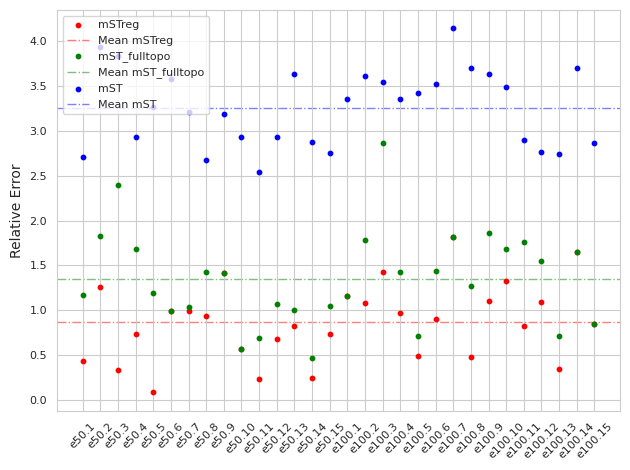

In [7]:
if save:
    folder='Figures/ORlibrary_Benchamark/'
    os.makedirs(folder,True)
s=10
fontsize=8
i=0
x=np.arange(0,len(costsalpha0_df))
c='rgb'
for i,label in enumerate(['mSTreg','mST_fulltopo','mST']):
    y=np.array(100*(costsalpha0_df[label]/costsalpha0_df['Optimum']-1))
    # y=np.concatenate([y,[np.mean(y)]])
    plt.scatter(x,y,s=s,label=label,c=c[i])
    plt.axhline(y=np.mean(y), c=c[i], linewidth=1,alpha=0.5,linestyle='-.', zorder=0,label='Mean %s'%label)

# plt.xlabel('Problem instance')
plt.ylabel('Relative Error')
plt.xticks(x,[problem_idx for problem_idx in costsalpha0_df.index],
           fontsize=fontsize,rotation=45, ha='center')
plt.yticks( fontsize=fontsize)
plt.legend(fontsize=fontsize,loc='upper left')
plt.grid('off');plt.tight_layout()
# plt.yscale('log')
if save:
    plt.savefig(folder+'Steiner_gap.png',dpi=200)
plt.show()